In [2]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Read data into dataframe 
df = pd.read_csv('movies.csv')

In [4]:
# Quick inspection of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Search for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()).round()
    print(f'{col} : {pct_missing}% ')

name : 0.0% 
rating : 0.0% 
genre : 0.0% 
year : 0.0% 
released : 0.0% 
score : 0.0% 
votes : 0.0% 
director : 0.0% 
writer : 0.0% 
star : 0.0% 
country : 0.0% 
budget : 0.0% 
gross : 0.0% 
company : 0.0% 
runtime : 0.0% 


In [7]:
#Data Cleaning

In [8]:
# check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Search for number of Nan in each column
for col in df.columns:
    num_missing = df[col].isnull().sum()
    print(f'The number of NaN values in {col} is {num_missing}')

The number of NaN values in name is 0
The number of NaN values in rating is 77
The number of NaN values in genre is 0
The number of NaN values in year is 0
The number of NaN values in released is 2
The number of NaN values in score is 3
The number of NaN values in votes is 3
The number of NaN values in director is 0
The number of NaN values in writer is 3
The number of NaN values in star is 1
The number of NaN values in country is 3
The number of NaN values in budget is 2171
The number of NaN values in gross is 189
The number of NaN values in company is 17
The number of NaN values in runtime is 4


In [10]:
# Change NaN values to numbers
# doing this for columns with high NaN count
# budget, gross

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [11]:
#Change data types of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [12]:
# Sort df, order by gross
df = df.sort_values("gross", inplace = False,ascending = False)

In [13]:
# drop duplicates
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [14]:
# Finding Correlations

In [15]:
# My Hypotheses
# There's a high correlation between the star of a movie and the gross revenue
# There's  a high correlation between the budget of a movie and the gross revenue
# There's a high correlation between the production company and the gross revenue
# There's a low correlation between the director and the gross revenue
# There's a low correlation between the movie ratings and the gross revenue

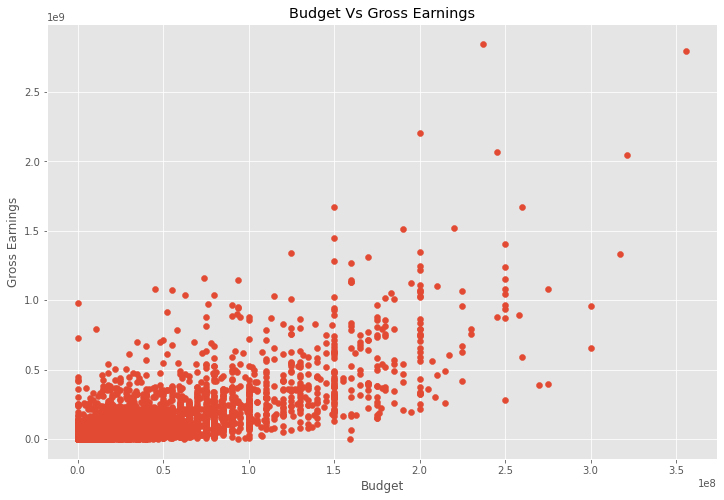

In [16]:
# scatter plot with budget vs gross

plt.scatter(df['budget'],df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

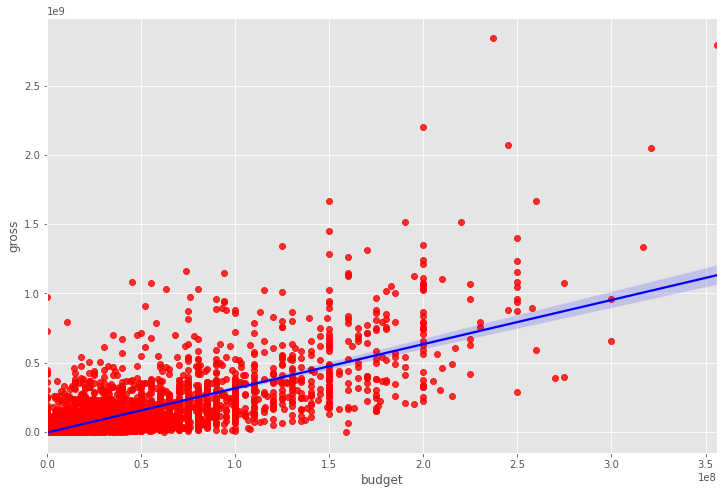

In [17]:
# Plotting budget Vs Gross using seaborn
sns.regplot(
    x = 'budget',y = 'gross', data = df, scatter=True, fit_reg=True, 
    scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})

In [18]:
# Correlation check

In [19]:
# correlation methods: pearson, kendall, spearman
corr_matrix = df.corr(method = 'pearson')
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


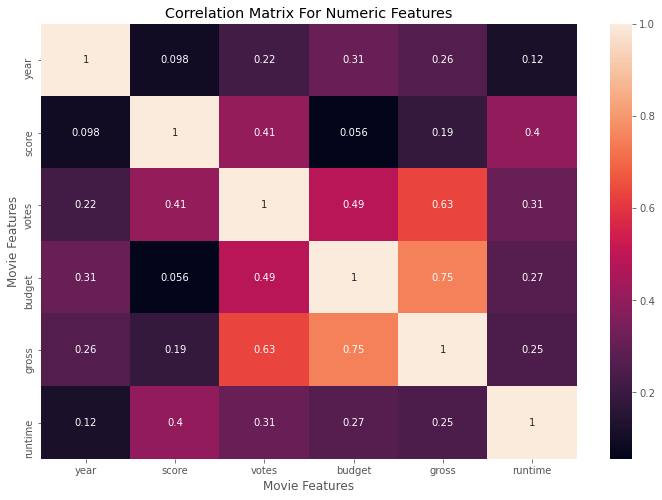

In [20]:
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
# Converting non-numeric movie features to numeric.
# numeric conversion is used for correlation.

df_numeric = df

for col_names in df_numeric.columns:
    if (df_numeric[col_names].dtype == 'object'):
        df_numeric[col_names] = df_numeric[col_names].astype('category')
        df_numeric[col_names] = df_numeric[col_names].cat.codes
    
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


In [155]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


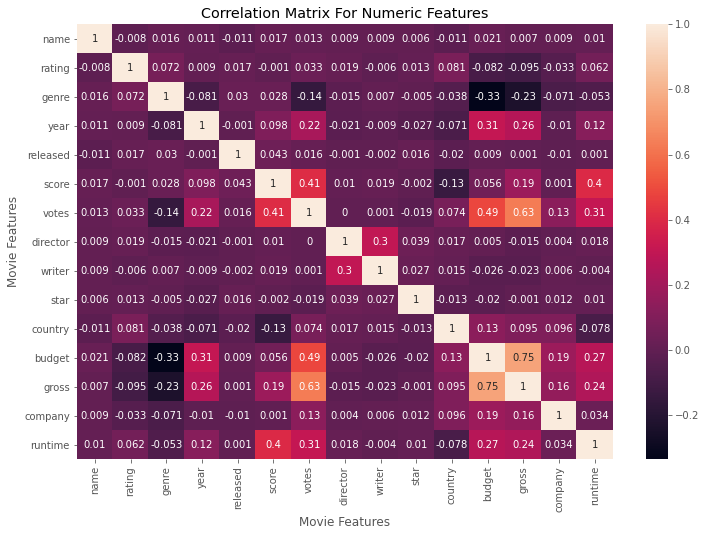

<Figure size 864x576 with 0 Axes>

In [22]:
# correlation methods: pearson, kendall, spearman
corr_matrix = df_numeric.corr(method = 'pearson').round(3)
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
plt.savefig('correlation_matrix.png')